# Bellwether Decision Tree Analysis

## Import Libaries

In [103]:
import pandas as pd
import numpy as np
import statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from graphviz import Source
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot

## Import & Clean Dataset

In [104]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)
pd.options.mode.chained_assignment = None

In [105]:
df = pd.read_csv('data/compiled_data/NonPolar.csv', index_col=0)

In [106]:
df.head()

Unnamed: 0.1  fips    state     county  wins  poverty_rate_1960  \
0            12  1023  Alabama    Choctaw     2               62.1   
1            17  1033  Alabama    Colbert     2               35.4   
2            18  1035  Alabama    Conecuh     3               63.7   
3            36  1071  Alabama    Jackson     2               52.1   
4            37  1073  Alabama  Jefferson     4               30.9   

   poverty_rate_1970  poverty_rate_1980  poverty_rate_1990  poverty_rate_2000  \
0               42.1               31.5               30.2               24.5   
1               22.4               14.5               14.6               14.0   
2               45.0               29.4               29.7               26.6   
3               24.4               15.7               16.6               13.7   
4               18.8               15.3               16.0               14.8   

   poverty_rate_2010  population_1960  population_1970  population_1980  \
0               20.2            18073            16515            16793   
1               16.2            46794            49352            54165   
2               30.4            18081            15545            15782   
3               16.2            37307            39127            51132   
4               17.0           629388           638855           662694   

   population_1990  population_2000  population_2010  persons_in_poverty_1960  \
0            15929            15738            13668                    11225   
1            51345            54384            53890                    16559   
2            13939            13987            13119                    11515   
3            47552            53333            52693                    19437   
4           639105           647628           645062                   194321   

   persons_in_poverty_1970  persons_in_poverty_1980  persons_in_poverty_1990  \
0                     6958                     5285                     4809   
1                    11076                     7869                     7477   
2                     7000                     4642                     4145   
3                     9530                     8052                     7901   
4                   119976                   101520                   102276   

   persons_in_poverty_2000  persons_in_poverty_2010  \
0                     3858                     2758   
1                     7592                     8735   
2                     3719                     3982   
3                     7293                     8533   
4                    95674                   109935   

   rural_urban_continuum_code_2013  urban_influence_code_2013  metro_2013  \
0                                6                          6           0   
1                                9                         10           0   
2                                7                         11           0   
3                                3                          2           1   
4                                8                          6           0   

   civilian_labor_force_2000  civilian_labor_force_2001  \
0                       9156                       9003   
1                       6184                       5869   
2                      11597                      11019   
3                      12180                      12047   
4                       3510                       3494   

   civilian_labor_force_2002  civilian_labor_force_2003  \
0                       9144                       9183   
1                       5731                       5651   
2                      10718                      10769   
3                      11709                      11722   
4                       3522                       3504   

   civilian_labor_force_2004  civilian_labor_force_2005  \
0                       9088                       9139   
1                       5462                       530

In [107]:
len(df)

626

In [108]:
# drop all unnecessary columns
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

In [109]:
df.head()

wins  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
0     2               62.1               42.1               31.5   
1     2               35.4               22.4               14.5   
2     3               63.7               45.0               29.4   
3     2               52.1               24.4               15.7   
4     4               30.9               18.8               15.3   

   poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
0               30.2               24.5               20.2            18073   
1               14.6               14.0               16.2            46794   
2               29.7               26.6               30.4            18081   
3               16.6               13.7               16.2            37307   
4               16.0               14.8               17.0           629388   

   population_1970  population_1980  population_1990  population_2000  \
0            16515            16793            15929            15738   
1            49352            54165            51345            54384   
2            15545            15782            13939            13987   
3            39127            51132            47552            53333   
4           638855           662694           639105           647628   

   population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
0            13668                    11225                     6958   
1            53890                    16559                    11076   
2            13119                    11515                     7000   
3            52693                    19437                     9530   
4           645062                   194321                   119976   

   persons_in_poverty_1980  persons_in_poverty_1990  persons_in_poverty_2000  \
0                     5285                     4809                     3858   
1                     7869                     7477                     7592   
2                     4642                     4145                     3719   
3                     8052                     7901                     7293   
4                   101520                   102276                    95674   

   persons_in_poverty_2010  rural_urban_continuum_code_2013  \
0                     2758                                6   
1                     8735                                9   
2                     3982                                7   
3                     8533                                3   
4                   109935                                8   

   urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
0                          6           0                       9156   
1                         10           0                       6184   
2                         11           0                      11597   
3                          2           1                      12180   
4                          6           0                       3510   

   civilian_labor_force_2001  civilian_labor_force_2002  \
0                       9003                       9144   
1                       5869                       5731   
2                      11019                      10718   
3                      12047                      11709   
4                       3494                       3522   

   civilian_labor_force_2003  civilian_labor_force_2004  \
0                       9183                       9088   
1                       5651                       5462   
2                      10769                      10391   
3                      11722                      11688   
4                       3504                       3484   

   civilian_labor_force_2005  civilian_labor_force_2006  \
0                       9139                       9238   
1                       5300                       5329   
2                      10126                      10261   
3             

In [110]:
# for counties that predicted 5 or more elections, replace "wins" column with 1; otherwise, replace with 0
count = 0
for x in df['wins']:
    if df.iloc[count, 0] >= 5:
        df.iloc[count, 0] = 1
    else:
        df.iloc[count, 0] = 0
    count += 1

In [111]:
df.head()

wins  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
0     0               62.1               42.1               31.5   
1     0               35.4               22.4               14.5   
2     0               63.7               45.0               29.4   
3     0               52.1               24.4               15.7   
4     0               30.9               18.8               15.3   

   poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
0               30.2               24.5               20.2            18073   
1               14.6               14.0               16.2            46794   
2               29.7               26.6               30.4            18081   
3               16.6               13.7               16.2            37307   
4               16.0               14.8               17.0           629388   

   population_1970  population_1980  population_1990  population_2000  \
0            16515            16793            15929            15738   
1            49352            54165            51345            54384   
2            15545            15782            13939            13987   
3            39127            51132            47552            53333   
4           638855           662694           639105           647628   

   population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
0            13668                    11225                     6958   
1            53890                    16559                    11076   
2            13119                    11515                     7000   
3            52693                    19437                     9530   
4           645062                   194321                   119976   

   persons_in_poverty_1980  persons_in_poverty_1990  persons_in_poverty_2000  \
0                     5285                     4809                     3858   
1                     7869                     7477                     7592   
2                     4642                     4145                     3719   
3                     8052                     7901                     7293   
4                   101520                   102276                    95674   

   persons_in_poverty_2010  rural_urban_continuum_code_2013  \
0                     2758                                6   
1                     8735                                9   
2                     3982                                7   
3                     8533                                3   
4                   109935                                8   

   urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
0                          6           0                       9156   
1                         10           0                       6184   
2                         11           0                      11597   
3                          2           1                      12180   
4                          6           0                       3510   

   civilian_labor_force_2001  civilian_labor_force_2002  \
0                       9003                       9144   
1                       5869                       5731   
2                      11019                      10718   
3                      12047                      11709   
4                       3494                       3522   

   civilian_labor_force_2003  civilian_labor_force_2004  \
0                       9183                       9088   
1                       5651                       5462   
2                      10769                      10391   
3                      11722                      11688   
4                       3504                       3484   

   civilian_labor_force_2005  civilian_labor_force_2006  \
0                       9139                       9238   
1                       5300                       5329   
2                      10126                      10261   
3             

In [112]:
len(df[df['wins'] == 1])

56

In [113]:
len(df[df['wins'] == 0])

570

## Create Decision Tree

In [114]:
# store all features except wins in x
# store wins in y
x = df.loc[:, df.columns != 'wins']
y = df.wins

In [115]:
# split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25,random_state=0)

# define tree depth to be 5
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

tree_model.fit(x_train, y_train)

y_pred = tree_model.predict(x_test)
(y_test - y_pred).map(lambda x: x*x).sum()

20

In [116]:
x_train.columns.values

array(['poverty_rate_1960', 'poverty_rate_1970', 'poverty_rate_1980',
       'poverty_rate_1990', 'poverty_rate_2000', 'poverty_rate_2010',
       'population_1960', 'population_1970', 'population_1980',
       'population_1990', 'population_2000', 'population_2010',
       'persons_in_poverty_1960', 'persons_in_poverty_1970',
       'persons_in_poverty_1980', 'persons_in_poverty_1990',
       'persons_in_poverty_2000', 'persons_in_poverty_2010',
       'rural_urban_continuum_code_2013', 'urban_influence_code_2013',
       'metro_2013', 'civilian_labor_force_2000',
       'civilian_labor_force_2001', 'civilian_labor_force_2002',
       'civilian_labor_force_2003', 'civilian_labor_force_2004',
       'civilian_labor_force_2005', 'civilian_labor_force_2006',
       'civilian_labor_force_2007', 'civilian_labor_force_2008',
       'civilian_labor_force_2009', 'civilian_labor_force_2010',
       'civilian_labor_force_2011', 'civilian_labor_force_2012',
       'civilian_labor_force_2013', 'c

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.12016
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

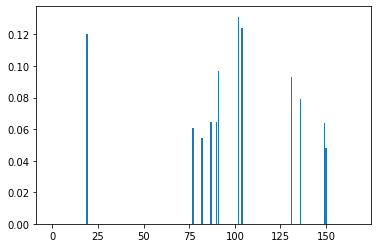

In [117]:
# calculate feature importance
importance = tree_model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [118]:
# feature with highest importance
x_train.columns[102]

'med_hh_income_percent_state_total_2019'

In [119]:
graph = Source(tree.export_graphviz(tree_model, out_file=None, feature_names=x_train.columns.values))

In [120]:
png = graph.pipe(format='png')

In [121]:
with open('poverty_rate_dtree.png','wb') as f:
    f.write(png)

In [122]:
Image(png)

In [123]:
# Assuming bellwethers are the positive class and nonbellwethers are the negative class:
# true negative: nonbellwethers classified correctly (top left)
# false positive: nonbellwethers classified incorrectly (bottom left)
# false negative: bellwethers classified incorrectly (top right)
# true positive: bellwethers classified correctly (bottom right)
metrics.confusion_matrix(y_test, y_pred)

array([[137,   6],
       [ 14,   0]])

In [124]:
# precision = tp / (tp + fp) - proportion of correctly identified bellwethers that were labeled bellwethers
# recall = tp / (tp + fn) - proportion of correctly identified bellwethers that were actually bellwethers
print(classification_report(y_test, y_pred, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       143
           1       0.00      0.00      0.00        14

    accuracy                           0.87       157
   macro avg       0.45      0.48      0.47       157
weighted avg       0.83      0.87      0.85       157



## Balancing Bellwethers and Nonbellwethers

In [125]:
# generate random sample of 56 bellwethers in df1
df1 = df[df.wins == 1].sample(56)

In [126]:
# generate random sample of 56 nonbellwethers and store in df2
df2 = df[df.wins == 0].sample(56)

In [127]:
# store both dataframes in df_new
df_new = df1.append(df2)

In [128]:
# store all features except wins in x_new
# store wins in y_new
x_new = df_new.loc[:, df_new.columns != 'wins']
y_new = df_new.wins

In [129]:
# split data into 75% training and 25% testing
x_train_new, x_test_new, y_train_new, y_test_new = \
    train_test_split(x_new, y_new, test_size=0.25,random_state=0)

# define tree depth to be 5
tree_model_new = DecisionTreeClassifier(random_state=0,max_depth=5)

tree_model_new.fit(x_train_new, y_train_new)

y_pred_new = tree_model_new.predict(x_test_new)
(y_test_new - y_pred_new).map(lambda x_new: x_new*x_new).sum()

12

In [130]:
x_train_new.columns.values

array(['poverty_rate_1960', 'poverty_rate_1970', 'poverty_rate_1980',
       'poverty_rate_1990', 'poverty_rate_2000', 'poverty_rate_2010',
       'population_1960', 'population_1970', 'population_1980',
       'population_1990', 'population_2000', 'population_2010',
       'persons_in_poverty_1960', 'persons_in_poverty_1970',
       'persons_in_poverty_1980', 'persons_in_poverty_1990',
       'persons_in_poverty_2000', 'persons_in_poverty_2010',
       'rural_urban_continuum_code_2013', 'urban_influence_code_2013',
       'metro_2013', 'civilian_labor_force_2000',
       'civilian_labor_force_2001', 'civilian_labor_force_2002',
       'civilian_labor_force_2003', 'civilian_labor_force_2004',
       'civilian_labor_force_2005', 'civilian_labor_force_2006',
       'civilian_labor_force_2007', 'civilian_labor_force_2008',
       'civilian_labor_force_2009', 'civilian_labor_force_2010',
       'civilian_labor_force_2011', 'civilian_labor_force_2012',
       'civilian_labor_force_2013', 'c

In [131]:
# calculate feature importance
importance_new = tree_model_new.feature_importances_

# summarize feature importance
for i,v in enumerate(importance_new):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance_new))], importance_new)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.10721
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

In [132]:
# feature with highest importance
x_train_new.columns[161]

'percent_asian_male_2019'

In [133]:
graph_new = Source(tree.export_graphviz(tree_model_new, out_file=None, feature_names=x_train_new.columns.values))

In [134]:
png_new = graph_new.pipe(format='png')

In [135]:
with open('poverty_rate_dtree_new.png','wb') as f:
    f.write(png_new)

In [136]:
Image(png_new)

In [137]:
# Assuming bellwethers are the positive class and nonbellwethers are the negative class:
# true negative: nonbellwethers classified correctly (top left)
# false positive: nonbellwethers classified incorrectly (bottom left)
# false negative: bellwethers classified incorrectly (top right)
# true positive: bellwethers classified correctly (bottom right)
metrics.confusion_matrix(y_test_new, y_pred_new)

array([[7, 7],
       [5, 9]])

In [138]:
# precision = tp / (tp + fp) - proportion of correctly identified bellwethers that were labeled bellwethers
# recall = tp / (tp + fn) - proportion of correctly identified bellwethers that were actually bellwethers
print(classification_report(y_test_new, y_pred_new, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.56      0.64      0.60        14

    accuracy                           0.57        28
   macro avg       0.57      0.57      0.57        28
weighted avg       0.57      0.57      0.57        28



## Average of 100 Runs After Balancing

In [139]:
# generate 100 random samples of 56 bellwethers and 56 nonbellwethers and store in main dict
main = {}
for x in range(100):
    main[x] = df[df.wins == 1].sample(56).append(df[df.wins == 0].sample(56))

In [140]:
# store all features except wins for each sample in x_average dict
# store wins for each sample in y_average dict
x_average = {}
y_average = {}
for x in range(100):
    x_average[x] = main[x].loc[:, main[x].columns != 'wins']
    y_average[x] = main[x].wins

In [141]:
x_train_average = {}
x_test_average = {}
y_train_average = {}
y_test_average = {}
tree_model_average = {}
y_pred_average = {}
for x in range(100):
    # split each sample into 75% training and 25% testing
    x_train_average[x], x_test_average[x], y_train_average[x], y_test_average[x] = \
        train_test_split(x_average[x], y_average[x], test_size=0.25,random_state=0)
    
    # define tree depth to be 5
    tree_model_average[x] = DecisionTreeClassifier(random_state=0,max_depth=5)
    
    tree_model_average[x].fit(x_train_average[x], y_train_average[x])
    
    x_temp = x_average[x]

    y_pred_average[x] = tree_model_average[x].predict(x_test_average[x])
    (y_test_average[x] - y_pred_average[x]).map(lambda x_temp: x_temp*x_temp).sum()

In [142]:
# copy tree_model_average dict into accuracy list
accuracy = []
for x in range(100):
    y = tree_model_average[x].score(x_test_average[x], y_test_average[x])
    accuracy.append(y)

Feature: 0, Score: 0.01583
Feature: 1, Score: 0.00795
Feature: 2, Score: 0.00701
Feature: 3, Score: 0.02863
Feature: 4, Score: 0.00152
Feature: 5, Score: 0.01239
Feature: 6, Score: 0.00335
Feature: 7, Score: 0.00244
Feature: 8, Score: 0.00232
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00637
Feature: 11, Score: 0.00666
Feature: 12, Score: 0.01556
Feature: 13, Score: 0.00776
Feature: 14, Score: 0.00538
Feature: 15, Score: 0.00417
Feature: 16, Score: 0.00475
Feature: 17, Score: 0.00642
Feature: 18, Score: 0.00856
Feature: 19, Score: 0.00994
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00046
Feature: 22, Score: 0.00119
Feature: 23, Score: 0.00036
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00173
Feature: 26, Score: 0.00079
Feature: 27, Score: 0.00118
Feature: 28, Score: 0.00214
Feature: 29, Score: 0.00353
Feature: 30, Score: 0.00217
Feature: 31, Score: 0.00193
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00197
Feature: 35, Score: 0.00000
Fe

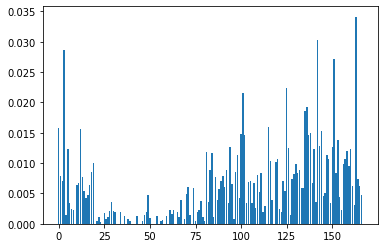

In [143]:
score_lists = [[] for x in range(167)]

for x in range(100):
    # extract feature importance for 100 runs
    importance_average = tree_model_average[x].feature_importances_
    
    # convert from np array to list
    importance_average.tolist()
    
    # append feature importance from each run to respective list
    for y in range(167):
        score_lists[y].append(importance_average[y])

# calculate mean importance for each feature
mean_list = []
for x in range(167):
    mean_list.append(statistics.mean(score_lists[x]))

# convert list of mean importances to array
mean_array = np.asarray(mean_list)

# print feature importance
for i,v in enumerate(mean_array):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(mean_array))], mean_array)
pyplot.show()



In [144]:
# feature with highest average importance
x_train_average[0].columns[163]

'percent_hispanic_male_2019'

In [145]:
# calculate standard deviation for each feature
sd_list = []
for x in range(167):
    sd_list.append(statistics.stdev(score_lists[x]))

# convert list of standard deviations to array
sd_array = np.asarray(sd_list)

# print standard deviation
for i,v in enumerate(sd_array):
    print('Feature: %0d, SD: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(sd_array))], sd_array)
pyplot.show()


Feature: 0, SD: 0.03949
Feature: 1, SD: 0.02896
Feature: 2, SD: 0.02660
Feature: 3, SD: 0.06123
Feature: 4, SD: 0.01138
Feature: 5, SD: 0.03894
Feature: 6, SD: 0.01965
Feature: 7, SD: 0.01778
Feature: 8, SD: 0.01330
Feature: 9, SD: 0.00000
Feature: 10, SD: 0.02112
Feature: 11, SD: 0.02912
Feature: 12, SD: 0.04473
Feature: 13, SD: 0.02735
Feature: 14, SD: 0.01970
Feature: 15, SD: 0.02269
Feature: 16, SD: 0.02130
Feature: 17, SD: 0.02393
Feature: 18, SD: 0.02803
Feature: 19, SD: 0.03537
Feature: 20, SD: 0.00000
Feature: 21, SD: 0.00456
Feature: 22, SD: 0.01190
Feature: 23, SD: 0.00357
Feature: 24, SD: 0.00000
Feature: 25, SD: 0.00862
Feature: 26, SD: 0.00791
Feature: 27, SD: 0.01184
Feature: 28, SD: 0.01070
Feature: 29, SD: 0.01243
Feature: 30, SD: 0.01020
Feature: 31, SD: 0.01122
Feature: 32, SD: 0.00000
Feature: 33, SD: 0.00000
Feature: 34, SD: 0.01392
Feature: 35, SD: 0.00000
Feature: 36, SD: 0.00854
Feature: 37, SD: 0.00000
Feature: 38, SD: 0.00499
Feature: 39, SD: 0.00422
Feature: 4

In [146]:
# classification report

precision_0 = []
recall_0 = []
f1_0 = []
support_0 = []
precision_1 = []
recall_1 = []
f1_1 = []
support_1 = []
accuracy = []


for x in range(100):
    report = classification_report(y_test_average[x], y_pred_average[x], output_dict=True)
    # matrix = metrics.confusion_matrix(y_test_average[x], y_pred_average[x])
    
    precision_0.append(report['0']['precision'])
    recall_0.append(report['0']['recall'])
    f1_0.append(report['0']['f1-score'])
    support_0.append(report['0']['support'])
    precision_1.append(report['1']['precision'])
    recall_1.append(report['1']['recall'])
    f1_1.append(report['1']['f1-score'])
    support_1.append(report['1']['support'])
    accuracy.append(report['accuracy'])
    
print('\nResults\nAccuracy: {}, {}'.format(statistics.mean(accuracy), statistics.stdev(accuracy)))
print('Precicion (0): {}, {}\nRecall (0): {}, {}\nF1-Score (0): {}, {}\nSupport (0): {}, {}'.format( 
    statistics.mean(precision_0), statistics.stdev(precision_0), 
    statistics.mean(recall_0), statistics.stdev(recall_0), 
    statistics.mean(f1_0), statistics.stdev(f1_0),
    statistics.mean(support_0), statistics.stdev(support_0)))
print('Precicion (1): {}, {}\nRecall (1): {}, {}\nF1-Score (1): {}, {}\nSupport (1): {}, {}'.format( 
    statistics.mean(precision_1), statistics.stdev(precision_1), 
    statistics.mean(recall_1), statistics.stdev(recall_1), 
    statistics.mean(f1_1), statistics.stdev(f1_1),
    statistics.mean(support_1), statistics.stdev(support_1)))


Results
Accuracy: 0.5346428571428571, 0.0912948550954183
Precicion (0): 0.5385578189010851, 0.09088159851249072
Recall (0): 0.5314285714285715, 0.1433325423170706
F1-Score (0): 0.5272085175558927, 0.10290103249959784
Support (0): 14, 0.0
Precicion (1): 0.5337348865874407, 0.11054854915466918
Recall (1): 0.5378571428571428, 0.1541212179577439
F1-Score (1): 0.5285495211589396, 0.11861309910222731
Support (1): 14, 0.0
